<a href="https://colab.research.google.com/github/isaacsemerson/deeplearning-python-fchollet/blob/main/fchollet_chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# These are the import requirements to run the code examples in this file.
# Always run this before any other cells.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print("tf.ones =", x)

x = tf.zeros(shape=(2,1))
print("tf.ones =", x)

tf.ones = tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.ones = tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Listing 3.1 - This shows how to create tensors with an initial value set of either 1's or 0's.

In [ ]:
x = tf.random.normal(shape=(3,1), mean=0, stddev=1)
print("Random distribution with a mean of 1:", x)

Random distribution with a mean of 1: tf.Tensor(
[[ 0.12774196]
 [ 1.1695731 ]
 [-0.4984437 ]], shape=(3, 1), dtype=float32)


Listing 3.2 - Creating tensor with initial values averaging around 0. Standard deviation is set to one, which means that most values will be very close to 0.

In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0, maxval=1)
print("Uniform distribution between 0 and 1:", x)

Uniform distribution between 0 and 1: tf.Tensor(
[[0.13451827]
 [0.8389317 ]
 [0.75061595]], shape=(3, 1), dtype=float32)


Listing 3.2 - Creating tensor with initial values sticking between 0 and 1 (uniform deviation).

In [ ]:
import numpy as np
x = np.ones(shape=(2,2))
print("tensor created with ones", x)
x[0,0] = 0
print("tensor after assigning first value to 0", x)

tensor created with ones [[1. 1.]
 [1. 1.]]
tensor after assigning first value to 0 [[0. 1.]
 [1. 1.]]


Listing 3.3 - Switching to numpy. Key point here is that numpy arrays are assignable after the initial call. I should also format scalars as "0." from now on it seems.

In [5]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

Listing 3.4 - This does not work. Point being that tensorflow tensors do not support assignment after the initial call. BUUUT you can use tf.Variables (shown below).

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print("Tensorflow variable:", v)

Tensorflow variable: <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.04123471],
       [-0.32746014],
       [ 0.05621161]], dtype=float32)>


Listing 3.5 - Tensorflow variables! This is how we manage/modify state in tensorflow. Apparently you need to provide a tensor as an initial value.

I believe that tf uses variables as a performance improvement for when it comes to calculating gradient and knowing which variables to track?

In [ ]:
v.assign(tf.ones((3, 1)))
print("Tensorflow variable after being modified:", v)

Tensorflow variable after being modified: <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


Listing 3.6 - This is how you modify a tensorflow variable.

In [ ]:
v[0,0].assign(3.)
print("Tensorflow variable after updating index 0,0 to a new value:", v)

Tensorflow variable after updating index 0,0 to a new value: <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


Listing 3.7 - This is how you update a subset of the tensor's coefficients (values).

In [ ]:
v.assign_add(tf.ones((3,1)))
print("Added 1 to each coefficient", v)
v.assign_sub(tf.ones((2,1)))
print("Subtracted 1 from each coefficient matching a (2,1) tensor:", v)

Added 1 to each coefficient <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[5.],
       [3.],
       [3.]], dtype=float32)>


InvalidArgumentError: {{function_node __wrapped__AssignSubVariableOp_device_/job:localhost/replica:0/task:0/device:GPU:0}} Cannot update variable with shape [3,1] using a Tensor with shape [2,1], shapes must be equal. [Op:AssignSubVariableOp] name: 

Listing 3.8 - assign_add/sub are how you do += or -= operations in tensorflow. Keep in mind that the assignment must represent a tensor of identical shape (the 2,1 assign_sub above does not work, as an example).

In [ ]:
a = tf.ones((2,2))
print("new tensor initiated with ones, shape 2,2:", a)
b = tf.square(a)
print("square the tensor", b)
c = tf.sqrt(a)
print("take the square root of the initial tensor", c)
d = b + c
print("Element-wise addition of square and square root tensors", d)
e = tf.matmul(a, b)
print("Dot product of the initial tensor and squared tensor", e)
e *= d
print("Element-wise multiplication of dot product tensor and addition tensor", e)


new tensor initiated with ones, shape 2,2: tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
square the tensor tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
take the square root of the initial tensor tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
Element-wise addition of square and square root tensors tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
Dot product of the initial tensor and squared tensor tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
Element-wise multiplication of dot product tensor and addition tensor tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


Listing 3.9 - This shows you how to do basic math operations to tensorflow tensors. Dot product is important to learn (matmul).

In [9]:
import tensorflow as tf
input_var = tf.Variable(initial_value=3.)
print("Initial TF variable:", input_var.numpy())
with tf.GradientTape() as tape:
  result = tf.square(input_var)
  print("TF variable squared", result.numpy())

gradient = tape.gradient(result, input_var)
print("Gradient of squared equation", gradient.numpy())

Initial TF variable: 3.0
TF variable squared 9.0
Gradient of squared equation 6.0


Listing 3.10 - GradientTape is a big part of tensorflow. It allows us to track a set of computations and return the gradient of an equation with respect to an input(s). Calculating gradient is important to learn.

In [4]:
import tensorflow as tf
input_const = tf.constant(3.)
print("Initial TF variable:", input_const.numpy())
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
  print("TF variable squared:", result.numpy())

gradient = tape.gradient(result, input_const)
print("Gradient of squared equation with respect to constant tensor:", gradient.numpy())

Initial TF variable: 3.0
TF variable squared: 9.0
Gradient of squared equation with respect to constant tensor: 6.0


Listing 3.11 - Same as 3.10 but this shows that you can use tensors other than tf.Variable in a tape, they just have to be watched. By default only "trainable variables" are tracked.


In [9]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
  print("Gradient of position equation as it relates to time (speed):", speed.numpy())
acceleration = outer_tape.gradient(speed, time)
print("Gradient of speed as it relates to time (acceleration):", acceleration.numpy())


Gradient of position equation as it relates to time (speed): 0.0
Gradient of speed as it relates to time (acceleration): 9.8


Listing 3.12 - Nested gradients (second-order gradients). This shows how to calculate the "gradient of a gradient" in tensorflow by nesting GradientTape().

In [10]:
num_samples_per_class = 1000
negative_samples =  np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples =  np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
print("Example of negative sample:", negative_samples[0])
print("Example of positive sample:", positive_samples[0])

Example of negative sample: [0.8676175  3.11757643]
Example of positive sample: [ 2.90980732 -0.09719236]


Listing 3.13 - Generating two sample classes for the upcoming linear classifier. The average will be around [0,3] and [3,0] respectively. The covariance signifies general variance "boundaries" for the samples. They are restricted to a 0.5-1, 0.5-1 variance area.

In [11]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print("Combined samples to one tensor of shape:", inputs.shape)

Combined samples to one tensor of shape: (2000, 2)


Listing 3.14 - Vertically stacking two sample sets, I am guessing this is prep for feeding into the model.

In [12]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
print("Negative and positive targets created", targets[0], targets [1001])

Negative and positive targets created [0.] [1.]


Listing 3.15 - Generating the targets for our samples. The first 1000 (1000,1) are for the negative set (represented by 0). The last (1000,1) are for the positive set (represented by 1).

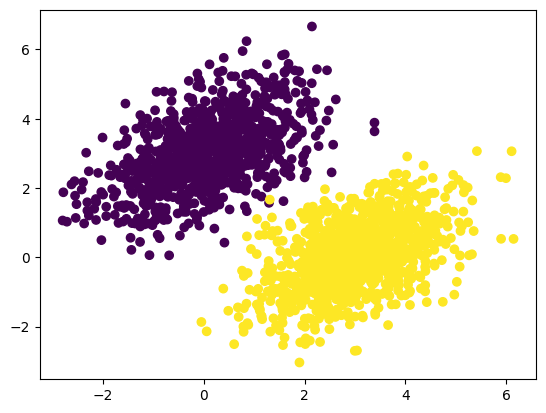

In [13]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Listing 3.16 - Plotting our sample data. The first two inputs[] calls are for plotting the "x" and "y" respectively. I think c=targets[] assigns the color to different values based on 0 or 1?

In [14]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print("Weights variable created:", W.numpy())
print("Bias variable created:", b.numpy())

Weights variable created: [[0.3329531 ]
 [0.29306126]]
Bias variable created: [0.]


Listing 3.17 - Starting the linear classifier model code. Here we are creating our weight and bias variables with starting values relative to the input dimension ([1, 2], a point on the graph) and the output dimension ([1.], either 0 or 1 for the label).

In [15]:
def model(inputs):
  affine_transform = tf.matmul(inputs, W) + b
  print("sample of returned affine transform (negative and positive):",
        affine_transform.numpy()[0],
        affine_transform.numpy()[1001])
  return affine_transform

model(inputs)

sample of returned affine transform (negative and positive): [1.2025168] [0.7589439]


<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[1.2025168 ],
       [0.1475935 ],
       [0.8794551 ],
       ...,
       [0.68635595],
       [0.42843568],
       [0.4292965 ]], dtype=float32)>

Listing 3.18 - Setting up the forward pass for our model, where the actual calculations take place.

In [16]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

print("returned loss value:", square_loss(targets, model(inputs)).numpy())

sample of returned affine transform (negative and positive): [1.2025168] [0.7589439]
returned loss value: 0.69502705


Listing 3.19 - This is our loss function to determine how well our model is doing. We subtract the predictions from the targets as our goal is to reduce the loss function. The loss function would be zero if the prediction was correct. I am not sure why we square it. Potentially to cancel negative numbers?

In [17]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_W, grad_loss_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_W * learning_rate)
  b.assign_sub(grad_loss_b * learning_rate)
  return loss

training_step(inputs, targets)

sample of returned affine transform (negative and positive): [1.2025168] [0.7589439]


<tf.Tensor: shape=(), dtype=float32, numpy=0.69502705>

Listing 3.20 - Here is one step/iteration of the model. This is a batch step (all samples) rather than mini-batch (certain amount of samples at a time).

We are running a forward pass with model(), calculating the loss with square_loss(), and then running a backward pass via tape.gradient() on the weight and bias. The "optimizer" part is assign_sub() on both weight and bias using gradient descent, minimizing the movement via a learning_rate scale.

Loss will decrease after every iteration!

In [20]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss as step {step}: {loss:.4f}")

sample of returned affine transform (negative and positive): [0.16169429] [0.8599405]
Loss as step 0: 0.0257
sample of returned affine transform (negative and positive): [0.16168046] [0.8602258]
Loss as step 1: 0.0257
sample of returned affine transform (negative and positive): [0.16166726] [0.8604988]
Loss as step 2: 0.0257
sample of returned affine transform (negative and positive): [0.16165462] [0.86075985]
Loss as step 3: 0.0257
sample of returned affine transform (negative and positive): [0.16164258] [0.8610098]
Loss as step 4: 0.0257
sample of returned affine transform (negative and positive): [0.16163096] [0.8612488]
Loss as step 5: 0.0257
sample of returned affine transform (negative and positive): [0.16161996] [0.8614775]
Loss as step 6: 0.0257
sample of returned affine transform (negative and positive): [0.16160932] [0.8616963]
Loss as step 7: 0.0257
sample of returned affine transform (negative and positive): [0.16159922] [0.8619057]
Loss as step 8: 0.0257
sample of returned

Listing 3.21 - This is the batch loop. In this case since we are training all samples this could be called epochs as well?

sample of returned affine transform (negative and positive): [0.16142967] [0.8654111]


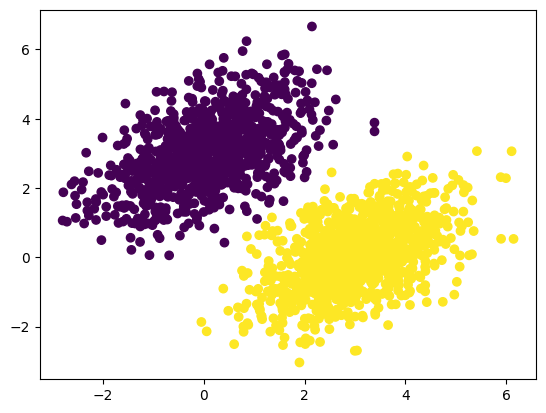

In [21]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

Listing 3.21b - This is what our model predicts. Key focus here is on the colors. Pretty cool how similar it is to our actual targets!

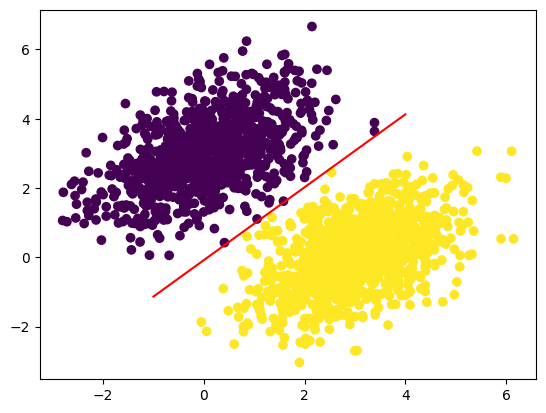

In [22]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

Listing 3.21c - This essentially plots the model's equation as a line (based on the trained weights). Anything above the line is classified as class 0 (negative), and anything below is class 1 (positive).